# Reached 75% accuracy

# Used the code from QuizDNN.py

In [1]:
from datetime import datetime
print("Current Date/Time:",datetime.now())

Current Date/Time: 2020-05-26 15:58:28.603092


In [2]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session9'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
import torchvision
import numpy as np
from utils import datapreparation
from utils import display
from model import QuizDNN
from utils import training
from utils import evaluate

In [5]:
classes, trainloader, testloader = datapreparation.load()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


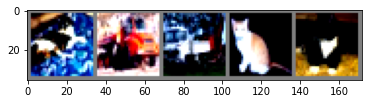

In [6]:
display.show_random_images(trainloader, classes)

In [0]:
# PASTING THE CODE FROM QUIZDNN.PY

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        )  

        # Convolution Block 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 


        # Max Pool 1
        self.pool1 = nn.MaxPool2d(2, 2) # output_size = 16, receptive field: 8

        # Convolution Block 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        # Max Pool 2
        self.pool2 = nn.MaxPool2d(2, 2) # output_size = 8, receptive field: 18

        # Convolution Block 3
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 


        # Max Pool 3
        self.pool3 = nn.MaxPool2d(2, 2) # output_size = 4, receptive field: 38

        # Convolution Block 4
        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
        ) 

        # Output Block 
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=8)
        ) 

        self.convblock10 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
        ) 

    def forward(self, x): 
        x1 = self.convblock1(x)
        x2 = self.convblock2(x1)
        x3 = self.convblock3(x1 + x2)     
        x4 = self.pool1(x1 + x2 + x3)

        x5 = self.convblock4(x4)

        x6 = self.convblock5(x4 + x5)
        x7 = self.convblock6(x4 + x5 + x6)

        x8 = self.pool1(x5 + x6 + x7)

        x9 = self.convblock7(x8)

        x10 = self.convblock8(x8 + x9)
        x11 = self.convblock9(x8 + x9 + x10)
        x12 = self.gap(x11)
        x13 = self.convblock10(x12)
        x13 = x13.view(-1, 10)      

        return F.log_softmax(x13, dim=-1)

In [8]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 16, 32, 32]           2,304
              ReLU-5           [-1, 16, 32, 32]               0
       BatchNorm2d-6           [-1, 16, 32, 32]              32
            Conv2d-7           [-1, 16, 32, 32]           2,304
              ReLU-8           [-1, 16, 32, 32]               0
       BatchNorm2d-9           [-1, 16, 32, 32]              32
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,304
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]              32
           Conv2d-14           [-1

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [10]:
EPOCHS = 40
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.285489559173584 Batch_id=390 Accuracy=42.28: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 4958/10000 (49.58%)

EPOCH: 2


Loss=1.2703967094421387 Batch_id=390 Accuracy=57.86: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5693/10000 (56.93%)

EPOCH: 3


Loss=1.050723671913147 Batch_id=390 Accuracy=63.49: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5597/10000 (55.97%)

EPOCH: 4


Loss=0.9532483816146851 Batch_id=390 Accuracy=66.71: 100%|██████████| 391/391 [00:18<00:00, 21.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 6681/10000 (66.81%)

EPOCH: 5


Loss=0.7792476415634155 Batch_id=390 Accuracy=69.35: 100%|██████████| 391/391 [00:18<00:00, 20.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6780/10000 (67.80%)

EPOCH: 6


Loss=0.7843769788742065 Batch_id=390 Accuracy=71.09: 100%|██████████| 391/391 [00:18<00:00, 20.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6812/10000 (68.12%)

EPOCH: 7


Loss=0.7334297895431519 Batch_id=390 Accuracy=72.77: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 7002/10000 (70.02%)

EPOCH: 8


Loss=0.6774545907974243 Batch_id=390 Accuracy=73.94: 100%|██████████| 391/391 [00:18<00:00, 21.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7072/10000 (70.72%)

EPOCH: 9


Loss=0.5148554444313049 Batch_id=390 Accuracy=75.05: 100%|██████████| 391/391 [00:18<00:00, 20.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7109/10000 (71.09%)

EPOCH: 10


Loss=0.624925434589386 Batch_id=390 Accuracy=76.07: 100%|██████████| 391/391 [00:18<00:00, 20.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 7021/10000 (70.21%)

EPOCH: 11


Loss=0.6045812368392944 Batch_id=390 Accuracy=76.82: 100%|██████████| 391/391 [00:18<00:00, 20.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7176/10000 (71.76%)

EPOCH: 12


Loss=0.6585232019424438 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7250/10000 (72.50%)

EPOCH: 13


Loss=0.5282770395278931 Batch_id=390 Accuracy=78.19: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7466/10000 (74.66%)

EPOCH: 14


Loss=0.5951550602912903 Batch_id=390 Accuracy=78.78: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7276/10000 (72.76%)

EPOCH: 15


Loss=0.7597507834434509 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:18<00:00, 20.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7424/10000 (74.24%)

EPOCH: 16


Loss=0.45736685395240784 Batch_id=390 Accuracy=79.58: 100%|██████████| 391/391 [00:19<00:00, 20.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7432/10000 (74.32%)

EPOCH: 17


Loss=0.8500536680221558 Batch_id=390 Accuracy=80.25: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7392/10000 (73.92%)

EPOCH: 18


Loss=0.5601739287376404 Batch_id=390 Accuracy=80.77: 100%|██████████| 391/391 [00:18<00:00, 20.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7301/10000 (73.01%)

EPOCH: 19


Loss=0.3816094994544983 Batch_id=390 Accuracy=81.10: 100%|██████████| 391/391 [00:18<00:00, 20.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7389/10000 (73.89%)

EPOCH: 20


Loss=0.7790853381156921 Batch_id=390 Accuracy=81.39: 100%|██████████| 391/391 [00:18<00:00, 20.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7332/10000 (73.32%)

EPOCH: 21


Loss=0.4604649543762207 Batch_id=390 Accuracy=81.84: 100%|██████████| 391/391 [00:18<00:00, 20.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7397/10000 (73.97%)

EPOCH: 22


Loss=0.6399620175361633 Batch_id=390 Accuracy=82.17: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7478/10000 (74.78%)

EPOCH: 23


Loss=0.47351735830307007 Batch_id=390 Accuracy=82.23: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7446/10000 (74.46%)

EPOCH: 24


Loss=0.6368139386177063 Batch_id=390 Accuracy=82.52: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7522/10000 (75.22%)

EPOCH: 25


Loss=0.4298270642757416 Batch_id=390 Accuracy=82.82: 100%|██████████| 391/391 [00:18<00:00, 20.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7376/10000 (73.76%)

EPOCH: 26


Loss=0.4539383053779602 Batch_id=390 Accuracy=83.12: 100%|██████████| 391/391 [00:19<00:00, 20.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7251/10000 (72.51%)

EPOCH: 27


Loss=0.49782872200012207 Batch_id=390 Accuracy=83.28: 100%|██████████| 391/391 [00:19<00:00, 20.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7428/10000 (74.28%)

EPOCH: 28


Loss=0.655083417892456 Batch_id=390 Accuracy=83.48: 100%|██████████| 391/391 [00:19<00:00, 20.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7326/10000 (73.26%)

EPOCH: 29


Loss=0.49942007660865784 Batch_id=390 Accuracy=83.76: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7514/10000 (75.14%)

EPOCH: 30


Loss=0.5838102102279663 Batch_id=390 Accuracy=84.02: 100%|██████████| 391/391 [00:19<00:00, 20.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7396/10000 (73.96%)

EPOCH: 31


Loss=0.4569401144981384 Batch_id=390 Accuracy=84.16: 100%|██████████| 391/391 [00:19<00:00, 20.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7367/10000 (73.67%)

EPOCH: 32


Loss=0.5372449159622192 Batch_id=390 Accuracy=84.16: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7460/10000 (74.60%)

EPOCH: 33


Loss=0.5649171471595764 Batch_id=390 Accuracy=84.46: 100%|██████████| 391/391 [00:19<00:00, 20.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7509/10000 (75.09%)

EPOCH: 34


Loss=0.45494475960731506 Batch_id=390 Accuracy=84.54: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7384/10000 (73.84%)

EPOCH: 35


Loss=0.38027381896972656 Batch_id=390 Accuracy=84.73: 100%|██████████| 391/391 [00:18<00:00, 20.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7477/10000 (74.77%)

EPOCH: 36


Loss=0.5317392945289612 Batch_id=390 Accuracy=84.90: 100%|██████████| 391/391 [00:19<00:00, 20.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7356/10000 (73.56%)

EPOCH: 37


Loss=0.5318095088005066 Batch_id=390 Accuracy=85.44: 100%|██████████| 391/391 [00:18<00:00, 20.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7345/10000 (73.45%)

EPOCH: 38


Loss=0.4990433156490326 Batch_id=390 Accuracy=85.22: 100%|██████████| 391/391 [00:19<00:00, 20.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7427/10000 (74.27%)

EPOCH: 39


Loss=0.49395570158958435 Batch_id=390 Accuracy=85.31: 100%|██████████| 391/391 [00:19<00:00, 20.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7459/10000 (74.59%)

EPOCH: 40


Loss=0.4618949890136719 Batch_id=390 Accuracy=85.41: 100%|██████████| 391/391 [00:18<00:00, 20.66it/s]



Test set: Average loss: 0.0062, Accuracy: 7491/10000 (74.91%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  plane plane   cat  deer   car
Predicted:  plane plane horse   dog   car


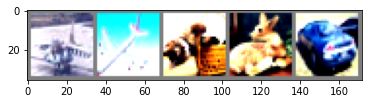

In [11]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [12]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 74 %


In [13]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 86 %
Accuracy of   car : 80 %
Accuracy of  bird : 63 %
Accuracy of   cat : 55 %
Accuracy of  deer : 88 %
Accuracy of   dog : 61 %
Accuracy of  frog : 76 %
Accuracy of horse : 70 %
Accuracy of  ship : 97 %
Accuracy of truck : 86 %
